In [1]:
import pandas as pd
import yfinance as yf
ticker = "NOKIA.HE"

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.figure_factory import create_table

In [2]:
data = yf.download(ticker, start="2019-01-01", end="2023-12-31")
data.reset_index(inplace=True)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,5.030,5.040,4.942,5.006,4.560038,14783198
1,2019-01-03,4.977,5.006,4.874,4.908,4.470769,13913719
2,2019-01-04,4.918,5.120,4.918,5.102,4.647486,17736514
3,2019-01-07,5.200,5.212,5.134,5.212,4.747687,16597787
4,2019-01-08,5.218,5.324,5.206,5.260,4.791411,20491208


In [3]:
data['Year'] = data['Date'].dt.year
data['Quarter'] = data['Date'].dt.quarter
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Month,Day
0,2019-01-02,5.0300,5.0400,4.9420,5.0060,4.560038,14783198,2019,1,1,2
1,2019-01-03,4.9770,5.0060,4.8740,4.9080,4.470769,13913719,2019,1,1,3
2,2019-01-04,4.9180,5.1200,4.9180,5.1020,4.647486,17736514,2019,1,1,4
3,2019-01-07,5.2000,5.2120,5.1340,5.2120,4.747687,16597787,2019,1,1,7
4,2019-01-08,5.2180,5.3240,5.2060,5.2600,4.791411,20491208,2019,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...
1253,2023-12-21,3.0300,3.0360,2.9525,3.0110,3.011000,15622772,2023,4,12,21
1254,2023-12-22,3.0050,3.0990,3.0045,3.0990,3.099000,14990041,2023,4,12,22
1255,2023-12-27,3.0660,3.1110,3.0660,3.0810,3.081000,11093666,2023,4,12,27
1256,2023-12-28,3.0720,3.0825,3.0370,3.0775,3.077500,10658920,2023,4,12,28


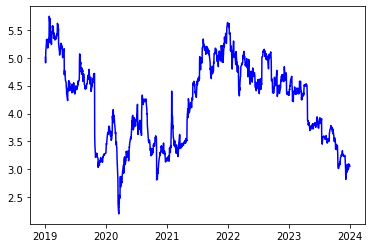

In [4]:
# import matlpoltlib.pyplot as plt
from matplotlib import pyplot as plt
plt.plot(data['Date'], data['Close'], color='blue')
plt.show()

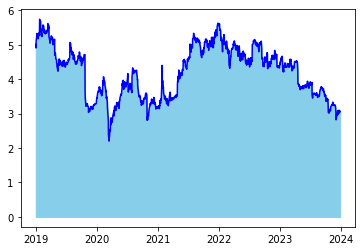

In [5]:
plt.fill_between(data['Date'], data['Close'], color='skyblue')
plt.plot(data['Date'], data['Close'], color='blue')
plt.show()

In [6]:
px.line(data, x='Date', y='Close', height=500)

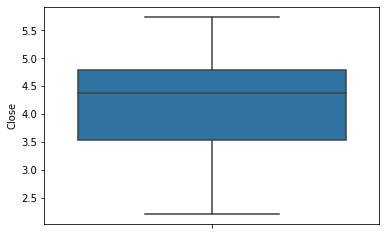

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.boxplot(data=data, y='Close')
plt.show()

In [8]:
px.box(data, y='Close', height=500, width=400 )

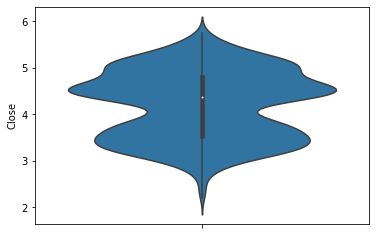

In [9]:
sns.violinplot(data=data, y='Close')
plt.show()

In [10]:
px.violin(data, y='Close', height=500, width=400 )

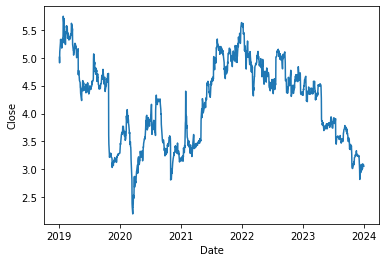

In [11]:
sns.lineplot(data, x='Date', y='Close')
plt.show()

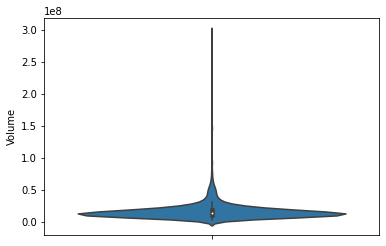

In [12]:
sns.violinplot(data=data, y='Volume')
plt.show()

In [13]:
px.violin(data, y='Volume', height=500, width=400 )

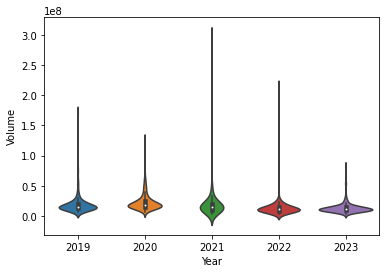

In [14]:
sns.violinplot(data=data, x = 'Year', y='Volume')
plt.show()

In [15]:
px.violin(data, x ='Year', y='Volume', height=500, width=600)

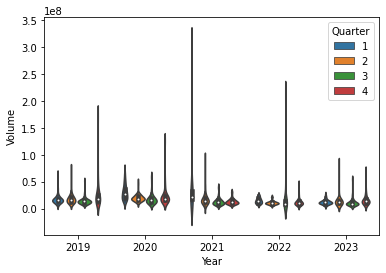

In [16]:
sns.violinplot(data=data, x = 'Year', y='Volume', hue = 'Quarter')
plt.show()

In [17]:
px.violin(data, x ='Year', y='Volume', height=500, width=600,  color='Quarter')

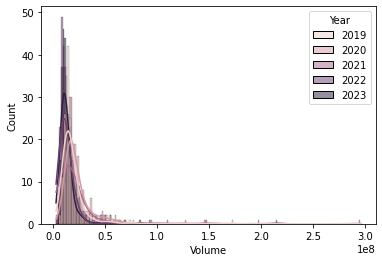

In [18]:
sns.histplot(data=data, x ='Volume', hue = 'Year', kde = True)
plt.show()

In [19]:
px.histogram(data, x ='Volume', height=500, width=600,  color='Year')

In [20]:
data['up_down']=['Up' if price > 0 else 'Down' for price in (data['Close']-data['Close'].shift(1))]
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Month,Day,up_down
0,2019-01-02,5.0300,5.0400,4.9420,5.0060,4.560038,14783198,2019,1,1,2,Down
1,2019-01-03,4.9770,5.0060,4.8740,4.9080,4.470769,13913719,2019,1,1,3,Down
2,2019-01-04,4.9180,5.1200,4.9180,5.1020,4.647486,17736514,2019,1,1,4,Up
3,2019-01-07,5.2000,5.2120,5.1340,5.2120,4.747687,16597787,2019,1,1,7,Up
4,2019-01-08,5.2180,5.3240,5.2060,5.2600,4.791411,20491208,2019,1,1,8,Up
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2023-12-21,3.0300,3.0360,2.9525,3.0110,3.011000,15622772,2023,4,12,21,Down
1254,2023-12-22,3.0050,3.0990,3.0045,3.0990,3.099000,14990041,2023,4,12,22,Up
1255,2023-12-27,3.0660,3.1110,3.0660,3.0810,3.081000,11093666,2023,4,12,27,Down
1256,2023-12-28,3.0720,3.0825,3.0370,3.0775,3.077500,10658920,2023,4,12,28,Down


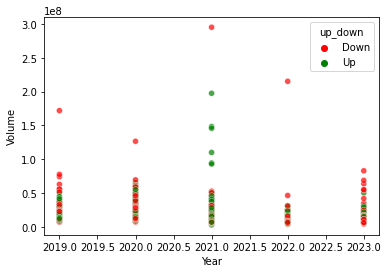

In [21]:
sns.scatterplot(data=data, x='Year', y='Volume', sizes=(20,200), alpha=0.7, hue='up_down', palette = {'Up':'green', 'Down':'red'})

plt.show()

In [22]:
px.scatter(data, x = 'Year', y= 'Volume', height=500, width=600,  color='up_down')

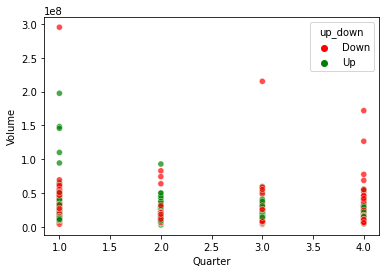

In [23]:
sns.scatterplot(data=data, x='Quarter', y='Volume', sizes=(20,200), alpha=0.7, hue='up_down', palette = {'Up':'green', 'Down':'red'})
plt.show()

In [24]:
px.scatter(data, x = 'Quarter', y= 'Volume', height=500, width=600,  color='up_down')

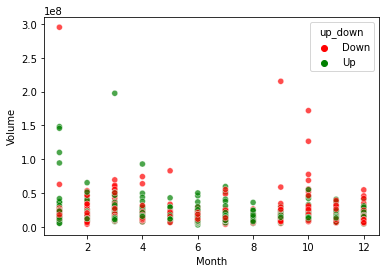

In [25]:
sns.scatterplot(data=data, x='Month', y='Volume', sizes=(20,200), alpha=0.7, hue='up_down', palette = {'Up':'green', 'Down':'red'})
plt.show()

In [26]:
px.scatter(data, x = 'Month', y= 'Volume', height=500, width=600,  color='up_down')

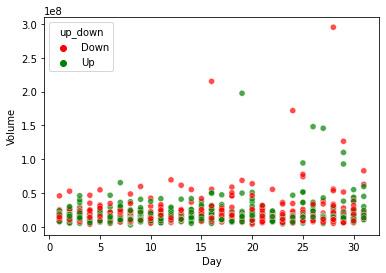

In [27]:
sns.scatterplot(data=data, x='Day', y='Volume', sizes=(20,200), alpha=0.7, hue='up_down', palette = {'Up':'green', 'Down':'red'})
plt.show()

In [28]:
px.scatter(data, x = 'Day', y= 'Volume', height=500, width=600,  color='up_down')

In [29]:
ticker = "BTC-USD"
data = yf.download(ticker, start="2019-01-01", end="2022-12-31")
data.reset_index(inplace=True)
print(data.shape)
data.head()

[*********************100%%**********************]  1 of 1 completed
(1460, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
1,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
3,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
4,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824


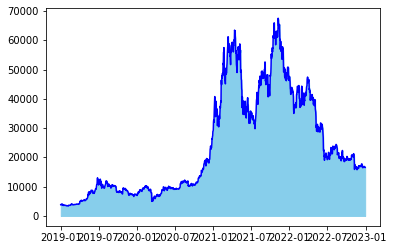

In [30]:
plt.fill_between(data['Date'], data['Close'], color='skyblue')
plt.plot(data['Date'], data['Close'], color='blue')
plt.show()

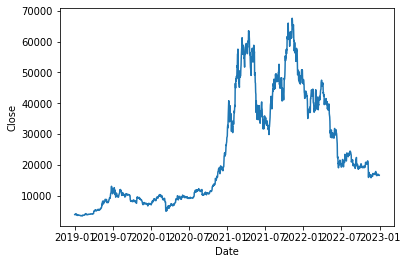

In [31]:
sns.lineplot(data, x='Date', y='Close')
plt.show()

In [32]:
px.line(data, x='Date', y='Close', height=500)

In [39]:
ticker = "TSLA"
data = yf.download(ticker, start="2019-01-01", end="2022-12-31")
data.reset_index(inplace=True)
print(data.shape)
data.head()

[*********************100%%**********************]  1 of 1 completed
(1008, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
1,2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2,2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
3,2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
4,2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500


In [40]:
px.line(data, x='Date', y='Close', height=500)

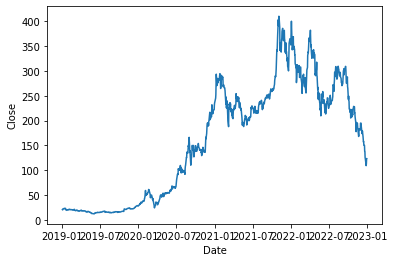

In [41]:
sns.lineplot(data, x='Date', y='Close')
plt.show()